# Feature Processing
In this notebook we clean the data, and process the features to fit our use.


In [19]:
# Import useful packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# Import custom functions
from scripts.proj1_helpers import *
from scripts.clean_data import *


In [119]:
data_path = 'data/train.csv'
y, tx, ids = load_csv_data(data_path, sub_sample=False)

print('Size of x:', x.shape )


Size of x: (250000, 30)


1. To start of we set all the values that are undefined (-999) to the median of the column (cannot use the mean as it is affected by outliers.  
2. We then take the log of all columns that are non-negative. This is because we this gives a much nicer distribution of values, as most of them followed the log-power law.
3. To make sure the scale of each feature is somewhat equal, we normalize by dividing by subracting the mean and dividing by standard deviation.

In [123]:
x = set_undefined_to_median(x)
x = apply_log(x)
x = apply_cosine_base(x)
x = remove_features(x,[14, 15, 17, 18, 20])
    

In [124]:
#x = apply_cosine_base(x)
#x = standardize(x)
#x = remove_features(x,[14, 15, 17, 18, 20, 22])



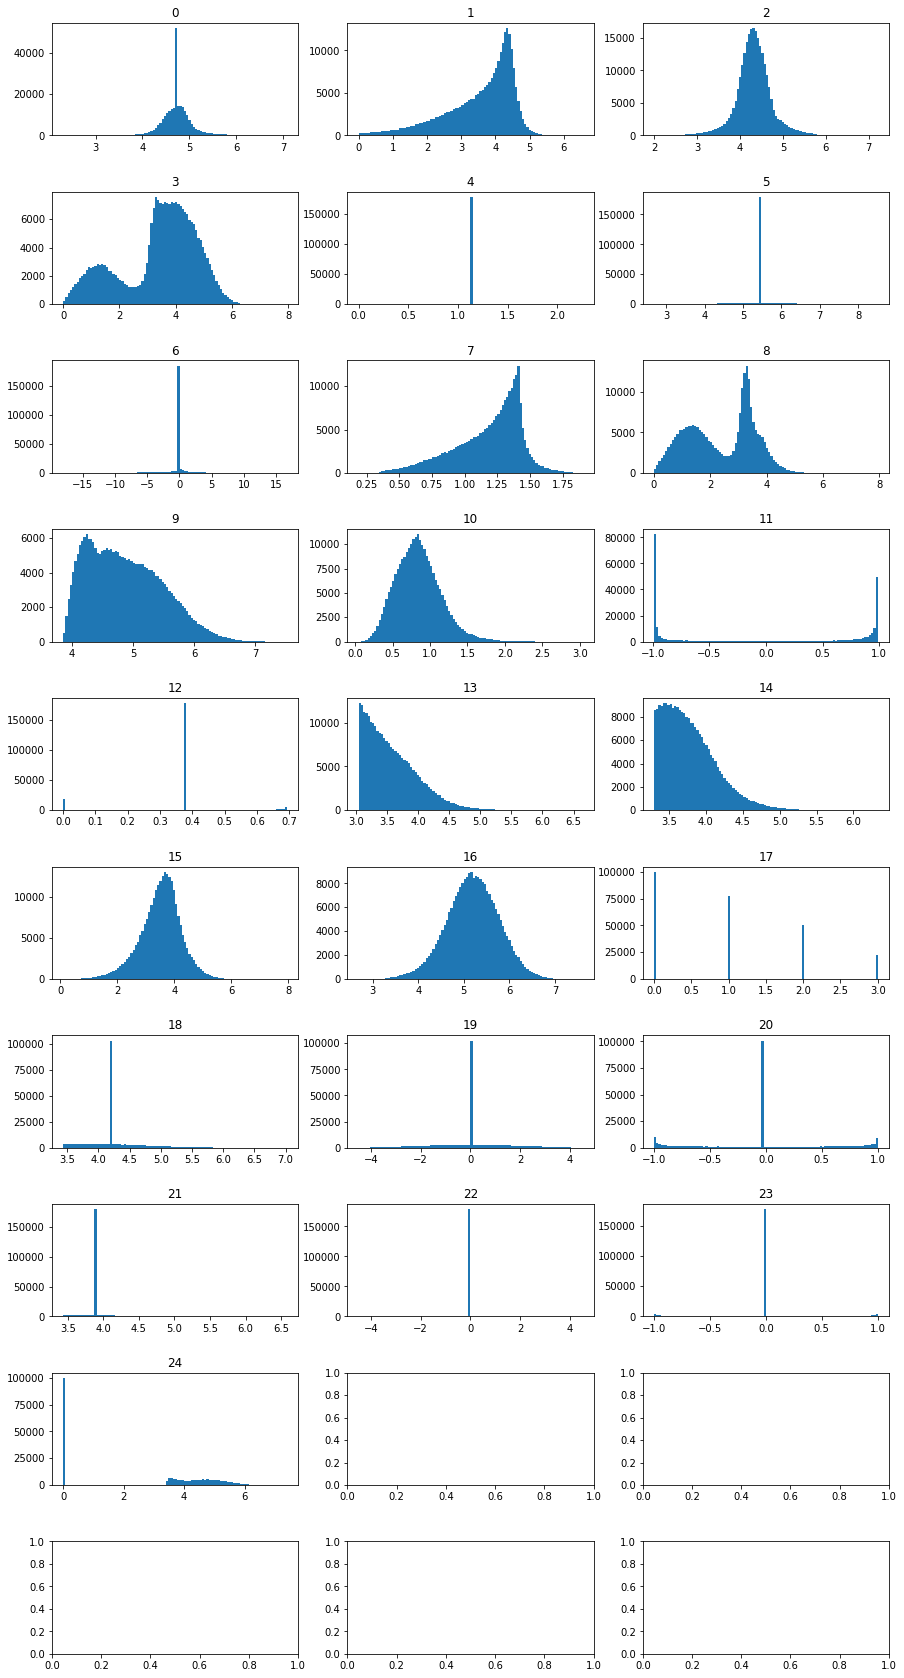

In [125]:
from scripts.plots import plot_hist

plot_hist(x)


As we  see in this graph we now have somewhat logical distributions on all the features.

In [92]:
pd.DataFrame(data=x).to_pickle('./pickles/x.pkl')
pd.DataFrame(data=y).to_pickle('./pickles/y.pkl')
